# Wrangling Features

In this notebook we drop features that might give unfair information, identify missing values, and explore the data.

In [1]:

#if working on goolge drive
goog_drive=False

if goog_drive:
    from google.colab import drive
    drive.mount('/content/drive')
    goog_dir = '/content/drive/My Drive/lending_club_project/'
else:
    goog_dir = ''



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utils

%matplotlib inline

### Raw Data

In [3]:
#get directory
df_train_path = os.path.join(goog_dir, 'data','df_train.csv.zip')
df_test_path = os.path.join(goog_dir,'data','df_test.csv.zip')

#download in chunks
df = utils.chunk_loader(df_train_path, index_col=0)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2142001,NaN,NaN,1400,1400,475.0,36 months,10.91,45.78,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142017,NaN,NaN,2525,2525,225.0,36 months,9.33,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142016,NaN,NaN,1000,1000,0.0,36 months,9.64,32.11,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142015,NaN,NaN,3500,3500,225.0,36 months,10.28,113.39,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2142014,NaN,NaN,6500,6500,0.0,36 months,9.64,208.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(2004062, 145)

### Table of Definitions

In [5]:
#read accompanying excel
excel_dir = os.path.join(goog_dir, 'LCDataDictionary.xlsx')
loan_stats = pd.read_excel(excel_dir, sheet_name='LoanStats')


#fix naming
loan_stats['LoanStatNew'] = loan_stats['LoanStatNew'].str.replace('verified_status_joint',
                                                                  'verification_status_joint')

loan_stats['LoanStatNew'] = loan_stats['LoanStatNew'].str.replace(u' \xa0', u'')

loan_stats['LoanStatNew'] = loan_stats['LoanStatNew'].str.strip()

loan_stats.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [6]:
loan_stats.shape

(153, 2)

In [7]:
#convert to dict
feat_to_text = dict(zip(loan_stats['LoanStatNew'], loan_stats['Description']))

# 1.0 Future Leak: Drop Cheat Features

In this part we wish to drop features that are recorded in the future. These features are not available to us when applying for loans and should not be taken in consideration

In [8]:
leak_cols = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 
             'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
             'collection_recovery_fee', 'collections_12_mths_ex_med', 
             'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 
             'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 
             'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 
             'initial_list_status', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct',
             'last_pymnt_amnt', 
             'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
             'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
             'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
             'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
             'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 
             'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  
             'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 
             'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 
             'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 
             'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 
             'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
             'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
             'total_rev_hi_lim']

In [9]:
#display columns
for leak in leak_cols:
    print('{}:'.format(leak))
    print(feat_to_text[leak])
    print(20*'*')
    

acc_now_delinq:
The number of accounts on which the borrower is now delinquent.
********************
acc_open_past_24mths:
Number of trades opened in past 24 months.
********************
avg_cur_bal:
Average current balance of all accounts
********************
bc_open_to_buy:
Total open to buy on revolving bankcards.
********************
bc_util:
Ratio of total current balance to high credit/credit limit for all bankcard accounts.
********************
chargeoff_within_12_mths:
Number of charge-offs within 12 months
********************
collection_recovery_fee:
post charge off collection fee
********************
collections_12_mths_ex_med:
Number of collections in 12 months excluding medical collections
********************
debt_settlement_flag:
Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.
********************
delinq_2yrs:
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
***

In [10]:
#drop leaks
df_small = df.drop(columns=leak_cols, axis=1)

drop_col_count = len(leak_cols)
print("The new dataframe has {} columns and lost {} after dropping future leaks".format(df_small.shape[1],
                                                                           drop_col_count))

The new dataframe has 86 columns and lost 59 after dropping future leaks


## 1.1 Columns with No Variance
We need to check if any feature repeats only 1 feature and is therefore useless to us. This will take out uncessary dimensions and remove noise. One might consider this a case of pre-pruning for tree based models.

In [11]:
#remove columns that have only 1 feature
#get unique values per feature
nunique_value = df_small.apply(pd.Series.nunique)
#note columns that have single value
single_value_cols = nunique_value[nunique_value == 1].index.tolist()


In [12]:
#see what we are dripping
for col in single_value_cols:
    print('{}:\n{}'.format(col, feat_to_text[col]))
    print(20*'*')

policy_code:
publicly available policy_code=1
new products not publicly available policy_code=2
********************
hardship_type:
Describes the hardship plan offering
********************
deferral_term:
Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan
********************
hardship_length:
The number of months the borrower will make smaller payments than normally obligated due to a hardship plan
********************


In [13]:
# drop the redundant columns
df_small = df_small.drop(columns=single_value_cols)

# 2.0 Identify the Target Variable

In [14]:
#see possibilities of target variable
df_small['loan_status'].value_counts()

Fully Paid                                             1031042
Current                                                 678324
Charged Off                                             261031
Late (31-120 days)                                       19885
In Grace Period                                           7764
Late (16-30 days)                                         3238
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     29
Name: loan_status, dtype: int64

In [15]:
#only care about paid and default
target_vals = ['Fully Paid', 'Charged Off']

#drop vlaues if not in list
df_target = df_small[df_small['loan_status'].isin(target_vals)]

#check values
df_target['loan_status'].value_counts()

Fully Paid     1031042
Charged Off     261031
Name: loan_status, dtype: int64

In [16]:
df_target.shape

(1292073, 82)

# 3.0 Missing Values Limits

In this section we will assess on a domain expertise basis if the data should be dropped or kept.<br>
Given that our target variable is unbalanced, some features with missing values might be key to a better performance. However given the case where we have too many missing values for a judgement call, we must drop some features beyond a certain threshold. 

In [17]:
#make dataframe to record mean missing
nan_df = pd.DataFrame(df_target.isna().mean(), columns=['mean_nan'])
#add dtypes
nan_df['dtypes'] = df_target.dtypes
#sort by most missing at top
nan_df = nan_df.sort_values(by=['mean_nan'], ascending=False)

nan_df = nan_df.reset_index()

nan_df.head()

,index,mean_nan,dtypes
0,id,1.000000,float64
1,member_id,1.000000,float64
2,next_pymnt_d,1.000000,object
3,url,1.000000,float64
4,orig_projected_additional_accrued_interest,0.997344,float64


In [18]:
#tally of average mission values
nan_df.mean()

mean_nan    0.585141
dtype: float64

In [19]:
nan_df.std()

mean_nan    0.430858
dtype: float64

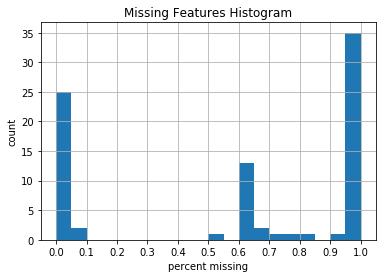

In [20]:
#draw histogram of missing values
nan_df.hist(column='mean_nan', bins=np.arange(0,1.05,0.05))
plt.xlabel("percent missing")
plt.ylabel("count")
plt.title("Missing Features Histogram")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

We decide to drop the features that have more than **50%** missing values.

In [21]:
#set the minimum missing percentage
nan_pct_min = 0.5

#get columns with more missing values than minimum
missing_cols = nan_df[nan_df['mean_nan']>=nan_pct_min]['index']

#drop the columns
df_drop_nan = df_target.drop(columns=missing_cols)

#see new shape
df_drop_nan.shape

(1292073, 27)

# 4.0 Make Features Numerical & Fill NaNs

In [22]:
df_drop_nan.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal                 int64
revol_util              float64
total_acc               float64
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

In [23]:
#inspect what is left from features with missing values
nan_df[(nan_df['mean_nan']<nan_pct_min) & (nan_df['mean_nan']!=0)]

,index,mean_nan,dtypes
55,emp_title,6.293994e-02,object
56,emp_length,5.765619e-02,object
57,mort_acc,3.659313e-02,float64
58,title,1.193895e-02,object
59,revol_util,6.168382e-04,float64
60,pub_rec_bankruptcies,5.394432e-04,float64
61,dti,2.228976e-04,float64
62,zip_code,7.739501e-07,object


## 4.1 term

In [24]:
df_drop_nan['term'].value_counts()

 36 months    980327
 60 months    311746
Name: term, dtype: int64

In [25]:
#Make a dict to convert term to integer
term_to_int = {' 36 months': 1, ' 60 months': 2}
term_to_int

{' 36 months': 1, ' 60 months': 2}

## 4.2 grade

In [26]:
df_drop_nan['grade'].value_counts()

B    377172
C    367025
A    223537
D    193278
E     90818
F     31334
G      8909
Name: grade, dtype: int64

In [27]:
feat_to_text['grade']

'LC assigned loan grade'

In [28]:
df_drop_nan['grade'].value_counts()

B    377172
C    367025
A    223537
D    193278
E     90818
F     31334
G      8909
Name: grade, dtype: int64

In [29]:
grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
grade_to_int

{'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

## 4.3 sub_grade
Note that is feature is related to the main grade

In [30]:
df_drop_nan['sub_grade'].value_counts()

C1    82199
B4    79899
B5    78982
B3    78944
C2    76307
C3    72097
C4    71542
B2    71064
B1    68283
C5    64880
A5    61459
A4    49876
D1    49481
D2    43031
A1    40736
D3    37811
A3    36077
A2    35389
D4    34195
D5    28760
E1    23053
E2    20834
E3    17833
E4    15231
E5    13867
F1     9710
F2     7033
F3     5964
F4     4766
F5     3861
G1     2894
G2     2092
G3     1587
G4     1255
G5     1081
Name: sub_grade, dtype: int64

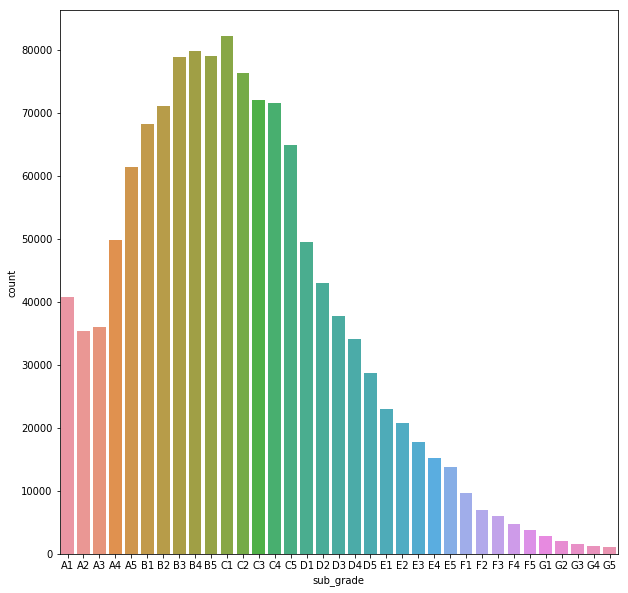

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='sub_grade', 
              data=df_drop_nan, 
              order=sorted(df_drop_nan['sub_grade'].unique()))
plt.savefig(os.path.join('plots', 'sub_grade_count.png'))

In [32]:
#get unique sub grades sorted in ascending order
sub_grade_sorted = sorted(df_drop_nan['sub_grade'].unique())[::-1]
sub_grade_to_int = dict(zip(sub_grade_sorted, np.arange(0, len(sub_grade_sorted))))
#print side to side
print(sub_grade_to_int)

{'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4, 'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9, 'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14, 'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19, 'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24, 'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29, 'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}


## 4.4 emp_title

In [33]:
#what are top  titles
df_drop_nan['emp_title'].value_counts()[:30]

Teacher                     20302
Manager                     18527
Owner                        9742
Registered Nurse             8402
RN                           8181
Supervisor                   7942
Sales                        7157
Driver                       7144
Project Manager              6085
Office Manager               5307
General Manager              4971
Director                     4815
owner                        4388
manager                      4348
Engineer                     4103
President                    3971
teacher                      3933
Vice President               3388
driver                       3384
Operations Manager           3314
Accountant                   3175
Sales Manager                2954
Administrative Assistant     2947
Attorney                     2939
Account Manager              2659
Police Officer               2610
Nurse                        2530
Technician                   2461
Analyst                      2453
sales         

There are a lot of titles to consider and it makes sense to turn this into a binary feature. we could make use of **pandas.get_dummies** method for this task however we will use a custom function that combines similar titles like VP and President into executives.

In [34]:
def emp_title_to_dict(e_title):
    #force make string if not and make lower
    title_lower = str(e_title).lower()
    
    #list of employment types to consider
    emp_list = ['e_manager', 'e_educ', 'e_self',
                'e_health', 'e_exec', 'e_driver',
                'e_law', 'e_admin', 'e_fin', 'e_other']
    
    #instantiate title dict
    title_dict = dict(zip(emp_list, len(emp_list)*[0]))
    
    #check and fill out dict
    if any(job in title_lower for job in ['manag', 'superv']):
        title_dict['e_manager'] = 1
        
    elif 'teacher' in title_lower:
        title_dict['e_educ'] = 1

    elif 'owner' in title_lower:
        title_dict['e_self'] = 1
    
    elif any(job in title_lower for job in ['rn', 'registered nurse', 'nurse',
                                          'doctor', 'pharm', 'medic']):
        title_dict['e_health'] = 1
    
    elif any(job in title_lower for job in ['vice president', 'president', 'director',
                                          'exec', 'chief']):
        title_dict['e_exec'] = 1
        
    elif any(job in title_lower for job in ['driver', 'trucker']):
        title_dict['e_driver'] = 1   
    
    elif any(job in title_lower for job in ['lawyer', 'legal', 'judg']):
        title_dict['e_law'] = 1    
    
    elif 'admin' in title_lower:
        title_dict['e_admin'] = 1    
    
    elif any(job in title_lower for job in ['analyst', 'financ', 'sales']):
        title_dict['e_fin'] = 1
    else:
        title_dict['e_other'] = 1
    
    return title_dict

In [35]:
#example
emp_title_to_dict('regional executive manager')

{'e_manager': 1,
 'e_educ': 0,
 'e_self': 0,
 'e_health': 0,
 'e_exec': 0,
 'e_driver': 0,
 'e_law': 0,
 'e_admin': 0,
 'e_fin': 0,
 'e_other': 0}

## 4.5 emp_length
This feature contains very few entries with missing values. It also raises the question of people with little to no work experience.

In [36]:
df_drop_nan['emp_length'].value_counts()

10+ years    424609
2 years      116845
< 1 year     103546
3 years      103296
1 year        84986
5 years       80925
4 years       77302
6 years       60401
8 years       58715
7 years       57705
9 years       49247
Name: emp_length, dtype: int64

In [37]:
def emp_time_to_int(emp_length_str):
    """
    extracts the digits from employment duration
    """
    
    #provision for missing values
    if pd.isna(emp_length_str):
        return 0
    
    emp_int = [char for char in (emp_length_str) if char.isdigit()]
    emp_int = ''.join(emp_int)

    if len(emp_int)>= 1:
        return int(emp_int)
    else:
        return 0
    

In [38]:
#example
emp_time_to_int('10+ years')

10

In [39]:
df_drop_nan['home_ownership'].value_counts()

MORTGAGE    639373
RENT        513888
OWN         138364
ANY            256
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

In [40]:
feat_to_text['home_ownership']

'The home ownership status provided by the borrower during registration\xa0or obtained from the credit report.\xa0Our values are: RENT, OWN, MORTGAGE, OTHER'

In [41]:
#make dict for homeownership rank ownership as lowest value
home_to_int = {'MORTGAGE': 4,
               'RENT': 3,
               'OWN': 5,         
               'ANY': 2,            
               'OTHER': 1,          
               'NONE':0 }

## 4.7 verification_status

In [42]:
df_drop_nan['verification_status'].value_counts()

Source Verified    499061
Verified           405315
Not Verified       387697
Name: verification_status, dtype: int64

In [43]:
feat_to_text['verification_status']

'Indicates if income was verified by LC, not verified, or if the income source was verified'

In [44]:
#dict to rank income verification
ver_stat_to_int = {'Source Verified':2,
                   'Verified': 1,
                   'Not Verified': 0}

## 4.10 loan_status
This is our binary target variable

In [45]:
df_drop_nan['loan_status'].value_counts()

Fully Paid     1031042
Charged Off     261031
Name: loan_status, dtype: int64

In [46]:
loan_stat_to_int = {'Fully Paid': 1,
                    'Charged Off': 0}

## 4.11 purpose

In [47]:
feat_to_text['purpose']

'A category provided by the borrower for the loan request. '

In [48]:
df_drop_nan['purpose'].value_counts()

debt_consolidation    751496
credit_card           283348
home_improvement       83569
other                  73984
major_purchase         27997
small_business         14915
medical                14826
car                    13954
moving                  9053
vacation                8607
house                   6803
wedding                 2294
renewable_energy         901
educational              326
Name: purpose, dtype: int64

In [49]:
def purpose_to_dummy(purpose_series, prefix='purp'):
    """
    returns dummy dataframe
    """
    
    return pd.get_dummies(purpose_series.str.lower(), prefix=prefix)

In [50]:
purpose_to_dummy(df_drop_nan['purpose']).head()

,purp_car,purp_credit_card,purp_debt_consolidation,purp_educational,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding
2139270,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2139264,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2139247,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2139246,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2139245,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## 4.12 title   

Note the subtle difference between title and purpose. Title is the loan title as given by the borrower, purpose is category provided by the borrower for the loan request. It might make sense to keep purpose and drop title as purpose is more concise.

In [51]:
feat_to_text['title']

'The loan title provided by the borrower'

In [52]:
df_drop_nan['title'].value_counts()[:25]

Debt consolidation           632850
Credit card refinancing      238323
Home improvement              71199
Other                         62925
Major purchase                22643
Debt Consolidation            15692
Medical expenses              12863
Business                      11264
Car financing                 10602
Vacation                       7596
Moving and relocation          7527
Home buying                    5447
Consolidation                  5353
debt consolidation             4812
Debt Consolidation Loan        3777
Credit Card Consolidation      2347
consolidation                  2163
Personal Loan                  2086
Consolidation Loan             1770
Home Improvement               1757
Credit Card Refinance          1464
Credit Card Payoff             1377
Consolidate                    1254
Personal                       1163
Loan                           1028
Name: title, dtype: int64

This is another instance where we should return a dataframe

In [53]:
def title_to_int(title):
    #force make string if not and make lower
    title_lower = str(title).lower()
    
    #list of employment types to consider
    title_list = ['debt_consol', 'refinancing', 'major',
                  'home', 'car', 'travel', 'health', 'business']
    
    #instantiate title dict
    title_dict = dict(zip(title_list,
                          len(title_list)*[0]))
    
    #check and fill out dict
    if 'consol' in title_lower:
        title_dict['debt_consol'] = 1
        
    if 'refinanc' in title_lower:
        title_dict['refinancing'] = 1

    if 'major' in title_lower:
        title_dict['major'] = 1
    
    if 'home imp' in title_lower:
        title_dict['home'] = 1
    
    if 'car' in title_lower:
        title_dict['car'] = 1
  
    if any(t in title_lower for t in ['travel', 'vacation']):
        title_dict['travel'] = 1       
    
    if any(t in title_lower for t in ['health', 'medic']):
        title_dict['health'] = 1
        
    if any(t in title_lower for t in ['business', 'invest']):
        title_dict['business'] = 1
    
    return title_dict

In [54]:
#example
title_to_int('HoMe ImprovemeNT')

{'debt_consol': 0,
 'refinancing': 0,
 'major': 0,
 'home': 1,
 'car': 0,
 'travel': 0,
 'health': 0,
 'business': 0}

## 4.13 zip_code
We will extract the first 3 digits of zip code to keep track of stats

In [55]:
#in future will wrangle data using zip code
df_drop_nan['zip_code'].str.replace('x', '').value_counts()[:5]

945    14488
750    13915
112    13298
606    11970
300    11601
Name: zip_code, dtype: int64

## 4.14 addr_state

In [56]:
df_drop_nan['addr_state'].value_counts()[:5]

CA    189338
TX    105705
NY    105546
FL     91694
IL     49620
Name: addr_state, dtype: int64

Might drop this feature at a later stage or use to wrangle data on a geographic basis.

## 4.15 earliest_cr_line & issue_d

In [57]:
def credit_time_delta(earliest_cr_line, issue_d):
    #get time differential
    time_delta = pd.to_datetime(issue_d) - pd.to_datetime(earliest_cr_line)
    return time_delta.dt.days

## 4.16 initial_list_status

In [58]:
#note that this was a cheat feature
feat_to_text['initial_list_status']

'The initial listing status of the loan. Possible values are – W, F'

In [59]:
# #convert to binary target
# initial_list_status_dict = {'w':0, 'f':1}

## 4.17 application_type

In [60]:
df_drop_nan['application_type'].value_counts()

Individual    1270168
Joint App       21905
Name: application_type, dtype: int64

In [61]:
application_type_dict = {'Individual': 0,
                         'Joint App': 1}

## 4.18 mo_sin_old_il_acct

In [62]:
feat_to_text['mo_sin_old_il_acct']

'Months since oldest bank installment account opened'

In [63]:
#df_drop_nan.hist(column='mo_sin_old_il_acct')

For this missing feature we decide to fill with the mode.

## 4.19 mo_sin_old_rev_tl_op

In [64]:
feat_to_text['mo_sin_old_rev_tl_op']

'Months since oldest revolving account opened'

In [65]:
# df_drop_nan.hist(column='mo_sin_old_rev_tl_op')

## 4.20 mort_acc

In [66]:
feat_to_text['mort_acc']

'Number of mortgage accounts.'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1351782d0>]],
      dtype=object)

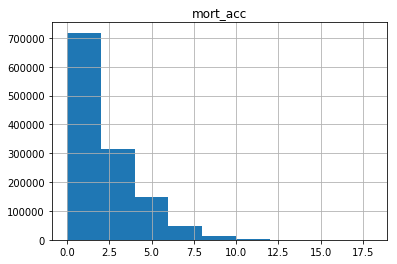

In [67]:
df_drop_nan.hist(column='mort_acc', bins=np.arange(0, 20, 2))

## 4.21 revol_util

In [68]:
feat_to_text['revol_util']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce43250>]],
      dtype=object)

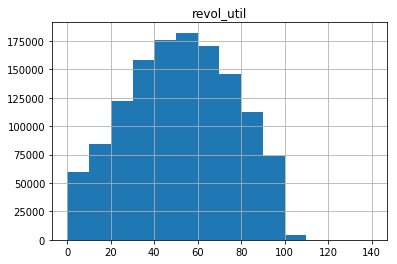

In [69]:
df_drop_nan.hist(column='revol_util', bins=np.arange(0,150,10))

## 4.22 pub_rec_bankruptcies

In [70]:
feat_to_text['pub_rec_bankruptcies']

'Number of public record bankruptcies'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128c0a090>]],
      dtype=object)

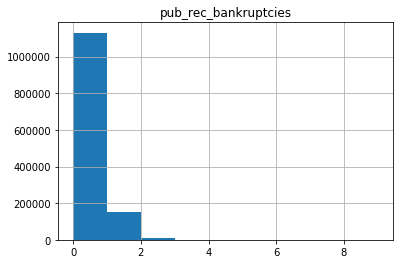

In [71]:
df_drop_nan.hist(column='pub_rec_bankruptcies', bins=np.arange(0, 10, 1))

## 4.22 dti

In [72]:
feat_to_text['dti']

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1233bea10>]],
      dtype=object)

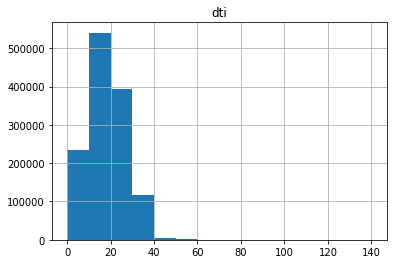

In [73]:
df_drop_nan.hist(column='dti', bins=np.arange(0, 150, 10))

## 4.18 Combine steps above in function

In this part we combine all the steps in the previous subsections into one custom function to clean the data. Based on our observations in the training set, this shall apply to the testing set as well.

In [74]:
#instantiate dict
mode_dict = {}
#loop over columns
for col in df_drop_nan.columns:
    mode_dict[col] = df_drop_nan[col].mode()[0]

#make dataframe object
df_train_mode = pd.DataFrame.from_dict(mode_dict,
                                       orient='index',
                                       columns=['mode'])

df_train_mode= df_train_mode.reset_index(drop=False)

df_train_mode_path = os.path.join(goog_dir,'data', 'df_train_mode.csv')

df_train_mode.to_csv(df_train_mode_path)

df_train_mode.head(10)

,index,mode
0,loan_amnt,10000
1,term,36 months
2,int_rate,10.99
3,installment,327.34
4,grade,B
5,sub_grade,C1
6,emp_title,Teacher
7,emp_length,10+ years
8,home_ownership,MORTGAGE
9,annual_inc,60000


In [75]:
df_train_mode.tail()

,index,mode
22,revol_util,0
23,total_acc,20
24,application_type,Individual
25,mort_acc,0
26,pub_rec_bankruptcies,0


In [76]:
df_train_mode[df_train_mode['index']=='mort_acc']['mode'].values[0]

0.0

In [77]:
df_train_mode[df_train_mode['index']=='pub_rec']

,index,mode
20,pub_rec,0


In [78]:
def df_object_to_num(df_obj, df_train_mode=df_train_mode):
    
    """Custom function to transform categorical features into numerical ones
    This function will also be applied on the testing data so that we apply the same exact kind of transformation
    """
    
    #make deep copy
    df_num = df_obj.copy()
    
    
    #keep track of columns to drop at end
    col_drop_list = ['title']
    

    #loads from path defined outside of function
        
    df_train_mode = pd.read_csv(goog_dir+'data/df_train_mode.csv')

    #fill missing values with mode
    for col in df_num.columns:
        #lookup fill value
        mode_val = df_train_mode[df_train_mode['index']==col]['mode'].values[0]
        #fill nan
        df_num[col] = df_num[col].fillna(mode_val)
        
        
    #drop nans in case we missed any
    df_num = df_num.dropna(axis=0)
        
        
    #fix types
    df_num = df_num.astype(
        {'mort_acc': 'float64',
         'dti': 'float64',
         #'mo_sin_old_il_acct': 'float64',
         #'mo_sin_old_rev_tl_op': 'float64',
         'pub_rec_bankruptcies': 'float64'
        })

    
    ### instantiate dicts ### 
    term_to_int = {' 36 months': 1,
                   ' 60 months': 2}
    
    grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
    
    #copied from above, we can write a function to generate this dict
    sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}
    
    
    home_to_int = {'MORTGAGE': 4,
               'RENT': 3,
               'OWN': 5,         
               'ANY': 2,            
               'OTHER': 1,          
               'NONE':0 }
    
    ver_stat_to_int = {'Source Verified':2,
                   'Verified': 1,
                   'Not Verified': 0}
    
    loan_stat_to_int = {'Fully Paid': 1,
                    'Charged Off': 0}
    
    initial_list_status_dict = {'w':0, 'f':1}
    
    application_type_dict = {'Individual': 0,
                         'Joint App': 1}
    
    
    #replacements
    df_num.replace({'term': term_to_int,
                    'grade':grade_to_int,
                    'sub_grade': sub_grade_to_int,
                    'home_ownership':home_to_int,
                    'verification_status':ver_stat_to_int,
                    'loan_status':loan_stat_to_int,
                    'initial_list_status':initial_list_status_dict,
                    'application_type': application_type_dict}, inplace=True)
    
    #fix zip codes and keep first 3
    df_num['zip_3'] = df_num['zip_code'].str.replace('x','')
    df_num['zip_2'] = df_num['zip_3'].str[:2]
    col_drop_list.append('zip_code')
    
    
    
    #employee length extract numbers
    df_num['emp_length'] = df_num['emp_length'].apply(emp_time_to_int)
    
    #store employees in list
    emp_title_list = []
    for emp in df_num['emp_title']:
        emp_title_list.append(emp_title_to_dict(emp))
    #make dataframe    
    df_emp_title = pd.DataFrame.from_dict(emp_title_list)
    df_emp_title.index = df_num.index
    #join
    df_num = pd.merge(df_num, df_emp_title, left_index=True, right_index=True)
    #df_num = pd.concat([df_num, df_emp_title], axis=1)
    #take out col
    col_drop_list.append('emp_title')
    
        

    #get time differential
    col_drop_list.extend(['issue_d', 'earliest_cr_line'])
    
    time_delta = pd.to_datetime(df_num['issue_d']) - pd.to_datetime(df_num['earliest_cr_line'])
    df_num['time_delta'] = time_delta.dt.days
    
    
    #get purpose
    purp_df = purpose_to_dummy(df_num['purpose'])
    purp_df  =purp_df.astype('int64')
    
    col_drop_list.append('purpose')
    purp_df.index = df_num.index
    
    #df_num = pd.concat([df_num, purp_df])
    df_num = pd.merge(df_num, purp_df, left_index=True, right_index=True)
    
    
    #drop more types
    col_drop_list.append('addr_state')
    
    df_num  = df_num.drop(columns=col_drop_list)
    
    return df_num

In [79]:
#make entries numerical
df_num = df_object_to_num(df_drop_nan)
df_num.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding
2139270,7500,1,13.75,255.43,3,13,1,5,22000.0,0,...,0,0,0,0,0,0,0,0,0,0
2139264,5000,1,7.43,155.38,7,33,1,5,85000.0,0,...,0,0,0,0,0,0,0,0,0,0
2139247,3500,1,9.96,112.87,6,25,1,3,13500.0,0,...,0,0,0,0,0,0,0,0,0,0
2139246,5000,1,9.01,159.03,6,28,1,4,250000.0,0,...,0,0,0,0,0,1,0,0,0,0
2139245,2700,1,15.96,94.88,2,6,1,3,52200.0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.19 Explore Features

### Interest Rate

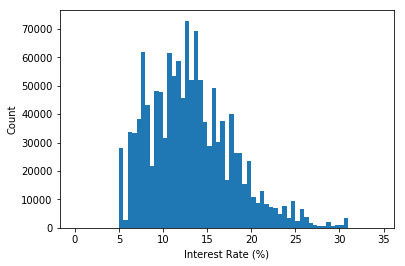

In [80]:
plt.hist(df_num['int_rate'], bins=np.arange(0, 35, 0.5))
plt.xlabel("Interest Rate (%)")
plt.ylabel("Count")
plt.show()

### Loan Amount

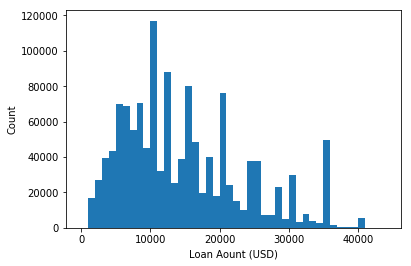

In [81]:
plt.hist(df_num['loan_amnt'], bins=np.arange(0, 45_000, 1000))
plt.xlabel("Loan Aount (USD)")
plt.ylabel("Count")
plt.show()

## Number of derogatory public records

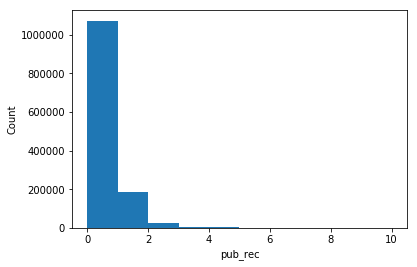

In [110]:
plt.hist(df_num['pub_rec'], bins=np.arange(0,11,1))
plt.xlabel("pub_rec")
plt.ylabel("Count")
plt.show()

## Annual Inc

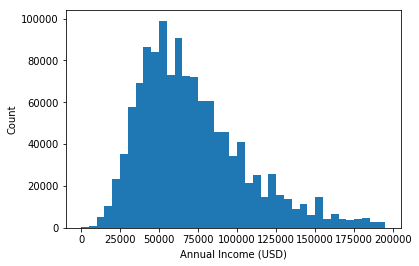

In [114]:
plt.hist(df_num['annual_inc'], bins=np.arange(0, 200_000, 5000))
plt.xlabel("Annual Income (USD)")
plt.ylabel("Count")
plt.show()

# 5.0 Custom Scaling

It makes more economic sense to compare observations to the micropolitan statistical area (MSA) rather than the whole nation. If the first digit of a zip code indicates a state, the second two digits denote central post office facility for that area. We shall therefore keep track of statistics such as the mean and standard deviation of samples grouped by the first 3 digits of zip code if there is sufficient data. Otherwise group by first 2 digits.

## 5.1 Macro Level

In [82]:
#instantiate groupby object
df_macro_groupby = df_num.drop(columns=['zip_3']).groupby(by='zip_2')

In [83]:
#take note of columns to scale
scale_cols = ['loan_amnt', 'term', 'int_rate', 'installment',
              'grade', 'sub_grade','emp_length', 'home_ownership',
              'annual_inc', 'open_acc', 'revol_bal', 'dti',
              'total_acc', 'mort_acc', 'time_delta']

In [84]:
#get mean
df_macro_mean = df_macro_groupby.mean()

#eliminate binary features
df_macro_mean = df_macro_mean[scale_cols]

df_macro_mean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,open_acc,revol_bal,dti,total_acc,mort_acc,time_delta
zip_2,,,,,,,,,,,,,,,
00,15817.500000,1.300000,13.001000,482.474000,5.300000,23.200000,7.300000,3.900000,77400.000000,11.100000,14004.700000,18.074000,28.100000,1.200000,6142.000000
01,15361.415220,1.268147,12.803955,462.144017,5.363081,23.899515,6.301173,3.707259,80454.829590,11.821025,18144.884056,17.350918,24.955168,1.693556,5978.337854
02,14809.246154,1.242272,12.839088,449.497686,5.361373,23.849941,6.041893,3.581065,79299.406929,11.589302,17669.103763,16.757010,24.290320,1.390580,5821.610888
03,14376.356527,1.239706,12.859303,434.978950,5.352378,23.818385,6.414459,3.746888,77424.508513,11.523141,17445.314874,18.958433,25.313278,1.815512,6025.756463
04,13856.960621,1.229063,12.868347,420.335269,5.336661,23.698281,6.463117,3.866334,66706.723566,11.231281,15859.820300,19.801525,24.908486,1.858014,6212.874099


In [85]:
#save statistics for later use
df_macro_mean.to_csv(os.path.join(goog_dir,'data/df_macro_mean.csv'))

In [86]:
#get std
df_macro_std = df_macro_groupby.std()

df_macro_std = df_macro_std[scale_cols]

df_macro_std.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,open_acc,revol_bal,dti,total_acc,mort_acc,time_delta
zip_2,,,,,,,,,,,,,,,
00,5331.745206,0.483046,5.049063,181.521301,1.337494,7.052186,3.233505,0.567646,34849.517771,4.067486,5808.620663,9.291131,12.887979,1.316561,2338.364291
01,8169.595446,0.443010,4.804053,243.913766,1.306209,6.524080,3.558952,0.629250,71122.867381,5.526714,23974.394010,12.007815,11.478721,2.037398,2682.340639
02,8207.455568,0.428468,4.773391,246.226781,1.299594,6.491595,3.601951,0.645892,53397.690891,5.437753,26540.929402,8.266727,11.511943,1.936532,2715.597752
03,8627.296527,0.426938,4.714925,259.217953,1.282453,6.402555,3.566418,0.627205,79362.499575,5.163058,24883.384228,9.565689,11.481426,2.077767,2588.317700
04,8541.284359,0.420346,5.029983,255.035168,1.248005,6.279376,3.658743,0.650615,43788.566078,5.363613,18938.846768,9.199075,11.832626,1.975383,2660.231962


In [87]:
#save statistics for later use
df_macro_std.to_csv(os.path.join(goog_dir,'data/df_macro_std.csv'))

In [88]:
#get counts
df_macro_count = pd.DataFrame(df_num['zip_2'].value_counts())
df_macro_count.head()

,zip_2
33,49389
92,47498
11,43076
60,37989
95,34767


In [89]:
df_macro_count.describe()

,zip_2
count,100.000000
mean,12920.730000
std,11129.257605
min,6.000000
25%,4504.750000
50%,8995.000000
75%,18905.000000
max,49389.000000


In [90]:
#sample measurement
df_macro_count.loc['85']

zip_2    28798
Name: 85, dtype: int64

Text(0.5, 1.0, 'Distribution of Loan Applications by 2 Digit Zip Code')

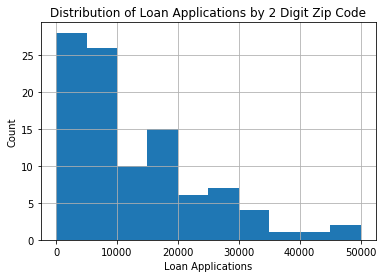

In [91]:
df_macro_count.hist(column='zip_2',
                    bins=np.arange(0, 55_000, 5000))
plt.xlabel("Loan Applications")
plt.ylabel("Count")
plt.title("Distribution of Loan Applications by 2 Digit Zip Code")

## 5.2 Micro Level

In [92]:
#instantiate groupby object
df_micro_groupby = df_num.drop(columns=['zip_2']).groupby(by='zip_3')

In [93]:
#get mean
df_micro_mean = df_micro_groupby.mean()

df_micro_mean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding
zip_3,,,,,,,,,,,,,,,,,,,,,
007,17500.000000,1.600000,15.444000,501.648000,4.600000,19.600000,8.400000,3.600000,95800.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
008,15668.750000,1.000000,10.747500,514.777500,6.000000,26.750000,5.750000,4.250000,61250.000000,0.500000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
009,8000.000000,1.000000,9.800000,257.390000,6.000000,27.000000,8.000000,4.000000,50000.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
010,14614.240964,1.272289,12.709022,439.634810,5.386024,24.012048,6.580241,3.764337,70454.915995,1.051566,...,0.083373,0.002410,0.016867,0.006747,0.003855,0.047711,0.000964,0.008193,0.002410,0.000964
011,13710.015528,1.273292,13.760668,415.731149,5.124224,22.580745,6.793478,3.760870,63547.224441,1.121118,...,0.065217,0.009317,0.012422,0.006211,0.001553,0.074534,0.001553,0.007764,0.006211,0.001553


In [94]:
#get std
df_micro_std = df_micro_groupby.std()

df_micro_std.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding
zip_3,,,,,,,,,,,,,,,,,,,,,
007,2179.449472,0.547723,4.256904,122.891795,1.140175,6.066300,3.577709,0.547723,36217.399134,0.707107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
008,7336.932119,0.000000,5.673085,244.584810,1.414214,7.544314,2.986079,0.500000,27060.118255,0.577350,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
010,7673.199751,0.445245,4.817369,232.434360,1.320010,6.603698,3.488609,0.626389,36604.391833,0.849721,...,0.276513,0.049041,0.128806,0.081882,0.061987,0.213205,0.031039,0.090164,0.049041,0.031039
011,7425.375548,0.445996,5.056193,214.745584,1.335053,6.644588,3.490385,0.607335,33787.476440,0.831488,...,0.247101,0.096147,0.110847,0.078627,0.039406,0.262842,0.039406,0.087839,0.078627,0.039406


In [95]:
df_num[df_num['zip_3']=='009']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding
817081,8000,1,9.8,257.39,6,27,8,4,50000.0,2,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#get counts
df_micro_count = pd.DataFrame(df_num['zip_3'].value_counts())
df_micro_count.head()

,zip_3
945,14489
750,13915
112,13298
606,11970
300,11601


In [97]:
df_micro_count.describe()

,zip_3
count,943.000000
mean,1370.172853
std,1929.640542
min,1.000000
25%,258.000000
50%,642.000000
75%,1647.000000
max,14489.000000


Text(0.5, 1.0, 'Distribution of Loan Applications by 3 digit Zip Code')

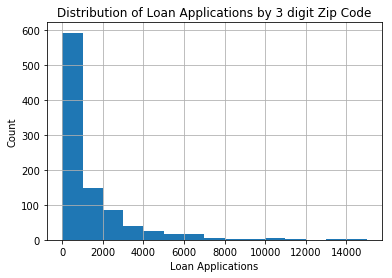

In [98]:
df_micro_count.hist(column='zip_3',
                    bins=np.arange(0, 16000, 1000))
plt.xlabel("Loan Applications")
plt.ylabel("Count")
plt.title("Distribution of Loan Applications by 3 digit Zip Code")

## 5.3 Scaling Function
In this section we will apply a standard scaler that relies on observations from the training data. The same scaler that was fitted on the training data will be used to transform both training and test data.

In [99]:
def custom_scaler(df_unscaled, zip_means = df_macro_mean, zip_std = df_macro_std):
    """
    Applies a custom scaling to a dataframe based on observations in same 2 digit zip code
    returns new dataframe
    
    """
    
    #nested for loops to scale by 2 digit zip code
    df_scaled_list = []
    for code in df_unscaled['zip_2'].unique():
        #make deep copy of localized zip
        df_local_zip = df_unscaled[df_unscaled['zip_2']==code].copy()

        #for each feature we want to scale
        for feat in zip_means.columns:
            #subtract and divide by std
            df_local_zip[feat] = (df_local_zip[feat] - zip_means.loc[code,feat]) / zip_std.loc[code,feat]
        
        #after scaling is done for local zip area we append to list
        df_scaled_list.append(df_local_zip)


    #concat in one df
    df_scaled = pd.concat(df_scaled_list)
    
    return df_scaled


df_train_scaled = custom_scaler(df_unscaled=df_num, zip_means = df_macro_mean, zip_std = df_macro_std)

df_train_scaled.head()

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding
2139270,-0.890562,-0.565438,0.190831,-0.788166,-1.817008,-1.671383,-1.399767,2.196862,-1.073069,0,...,0,0,0,0,0,0,0,0,0,0
2139245,-1.475396,-0.565438,0.653814,-1.440208,-2.586479,-2.749700,-1.399767,-0.899632,-0.507501,0,...,0,0,0,0,0,0,0,0,0,0
2139236,-1.103783,-0.565438,-1.133175,-1.099830,1.260876,1.409524,1.098878,0.648615,0.855853,0,...,0,0,0,0,0,0,0,0,0,0
2139235,-1.377924,-0.565438,-0.536115,-1.365033,-0.278066,0.023116,-1.399767,-0.899632,-1.110524,0,...,0,0,0,0,1,0,0,0,0,0
2139225,-0.890562,-0.565438,-0.999098,-0.870123,1.260876,1.101433,-1.399767,0.648615,1.324038,0,...,1,0,0,0,0,0,0,0,0,0


# 6.0 Repeat On Test Data

In [100]:
#load test data
df_test = utils.chunk_loader(df_test_path, index_col=0)

In [101]:
#drop leak columns
df_test = df_test.drop(columns=leak_cols, axis=1)

# drop the redundant columns
df_test = df_test.drop(columns=single_value_cols)

#drop vlaues if not in list
df_test = df_test[df_test['loan_status'].isin(target_vals)]

#drop the columns
df_test = df_test.drop(columns=missing_cols)

In [102]:
#make numerical
df_test_num = df_object_to_num(df_test)

#scale 
df_test_scaled = custom_scaler(df_test_num)

In [103]:
#peak
df_test_scaled.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purp_debt_consolidation,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation
244697,2.711773,-0.558356,-1.237809,2.819585,1.316121,1.317800,-0.793118,0.338525,0.263661,2,...,0,0,0,0,0,0,0,0,1,0
244789,0.836039,1.790907,0.416115,0.289097,-0.236910,-0.243374,0.041428,0.338525,0.411947,2,...,0,0,0,0,0,0,0,0,0,0
244459,1.608400,-0.558356,1.040837,2.253124,-1.013426,-0.711727,1.154156,0.338525,-0.181633,2,...,1,0,0,0,0,0,0,0,0,0
245213,1.056714,1.790907,-0.630029,0.233329,0.539606,0.849448,0.041428,-1.226754,-0.059664,1,...,0,0,0,0,0,0,0,0,0,0
245189,-1.039695,-0.558356,-1.104394,-1.027633,1.316121,1.161682,-1.349481,0.338525,0.902531,0,...,0,1,0,0,0,0,0,0,0,0


# 6.1 Shape Check

In some functions for the training data we used a pd.get_dummies method which might return novel columns between train and testdata. We must ensure that both datas have the same shape to fit similar algorithms. For examples we see that in the test set there is no loans for educations or weddings. This could be a product that was discontinued. In addition our testing set might not be representative enough, for example we only have the first few months of the year which are not typically wedding season.

In [104]:
different_columns = set.difference(set(df_train_scaled.columns), set(df_test_scaled.columns))
different_columns

{'purp_educational', 'purp_wedding'}

In [105]:
#get common columns with set intersection
common_cols_set = set.intersection(set(df_train_scaled.columns), set(df_test_scaled.columns))
common_cols_list = list(common_cols_set)

In [106]:
df_train_scaled = df_train_scaled[common_cols_list]
df_test_scaled = df_test_scaled[common_cols_list]

# 7.0 Save

In [107]:
#zip columns no longer needed
zip_cols = ['zip_2', 'zip_3']

#drop columns
df_train_save = df_train_scaled.drop(columns=zip_cols)
df_test_save = df_test_scaled.drop(columns=zip_cols)

#save as compressed zipped files to save space
df_train_save.to_csv(os.path.join(goog_dir,'data','df_train_scaled.csv'), compression='zip')
df_test_save.to_csv(os.path.join(goog_dir,'data','df_test_scaled.csv'),compression='zip')

# 8.0 Conclusion
This concludes the feature engineering part of the project. In the next notebook we will evaluate machine learning models to select a best performer and iterate on it.